<a href="https://colab.research.google.com/github/Rogerio-mack/Analise_Exploratoria_de_Dados/blob/main/AED_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg"  width=300, align="right">
<br>
<br>
<br>
<br>
<br>

# Visualização de Dados em R
---

Aqui você aprenderá comandos básicos de R para diferentes visualizações dos dados. Aprenderá a produzir gráficos como de tendência (linha), de distribuição (histograma, boxplot e densidade), relações (dispersão) e proporção (barras, pizza) dos dados. Você aprenderá também como interpretar esses dados e, em conjunto com seleções de dados e a estatística descritiva que viu anteriormente, criar Análises Exploratórias de Dados completas.

# Introdução

**Por que visualizar os dados?** O **Quarteto de Anscombe** (F.J. Anscombe, 1973) talvez seja o exemplo mais conhecido que ilustra o valor da visualização dos dados.

Os quatro conjuntos de dados exibidos abaixo, pares $(x,y)$, apresentam com até 3 casas decimais as mesmas médias e variâncias de $x$ e $y$ e correlação de 0.816, levando todos a uma mesma regressão linear. Você aprenderá sobre Regressão Linear na Aula 7, e por hora é suficiente que você entenda que a regressão linear é uma aproximação de pontos por uma reta.

$$y = 3 + 0.5 x$$

       x1             x2             x3             x4           y1        
 Min.   : 4.0   Min.   : 4.0   Min.   : 4.0   Min.   : 8   Min.   : 4.260  
 1st Qu.: 6.5   1st Qu.: 6.5   1st Qu.: 6.5   1st Qu.: 8   1st Qu.: 6.315  
 Median : 9.0   Median : 9.0   Median : 9.0   Median : 8   Median : 7.580  
 Mean   : 9.0   Mean   : 9.0   Mean   : 9.0   Mean   : 9   Mean   : 7.501  
 3rd Qu.:11.5   3rd Qu.:11.5   3rd Qu.:11.5   3rd Qu.: 8   3rd Qu.: 8.570  
 Max.   :14.0   Max.   :14.0   Max.   :14.0   Max.   :19   Max.   :10.840  
       y2              y3              y4        
 Min.   :3.100   Min.   : 5.39   Min.   : 5.250  
 1st Qu.:6.695   1st Qu.: 6.25   1st Qu.: 6.170  
 Median :8.140   Median : 7.11   Median : 7.040  
 Mean   :7.501   Mean   : 7.50   Mean   : 7.501  
 3rd Qu.:8.950   3rd Qu.: 7.98   3rd Qu.: 8.190  
 Max.   :9.260   Max.   :12.74   Max.   :12.500  

Analysis of Variance Table

Response: y1
          Df Sum Sq Mean Sq F value  Pr(>F)   
x1         1 27.510 27.5100   17.99 0.00217 **
Residuals  9 13.763  1.5292                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Analysis of Variance Table

Response: y2
          Df Sum Sq Mean Sq F value   Pr(>F)   
x2         1 27.500 27.5000  17.966 0.002179 **
Residuals  9 13.776  1.5307                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Analysis of Variance Table

Response: y3
          Df Sum Sq Mean Sq F value   Pr(>F)   
x3         1 27.470 27.4700  17.972 0.002176 **
Residuals  9 13.756  1.5285                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Analysis of Variance Table

Response: y4
          Df Sum Sq Mean Sq F value   Pr(>F)   
x4         1 27.490 27.4900  18.003 0.002165 **
Residuals  9 13.742  1.5269                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘

,lm1,lm2,lm3,lm4
(Intercept),3.0000909,3.000909,3.0024545,3.0017273
x1,0.5000909,0.500000,0.4997273,0.4999091


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),3.0000909,1.1247468,2.667348,0.025734051
x1,0.5000909,0.1179055,4.241455,0.002169629
,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),3.000909,1.1253024,2.666758,0.025758941
x2,0.500000,0.1179637,4.238590,0.002178816
,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),3.0024545,1.1244812,2.670080,0.025619109
x3,0.4997273,0.1178777,4.239372,0.002176305
,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),3.0017273,1.1239211,2.670763,0.025590425


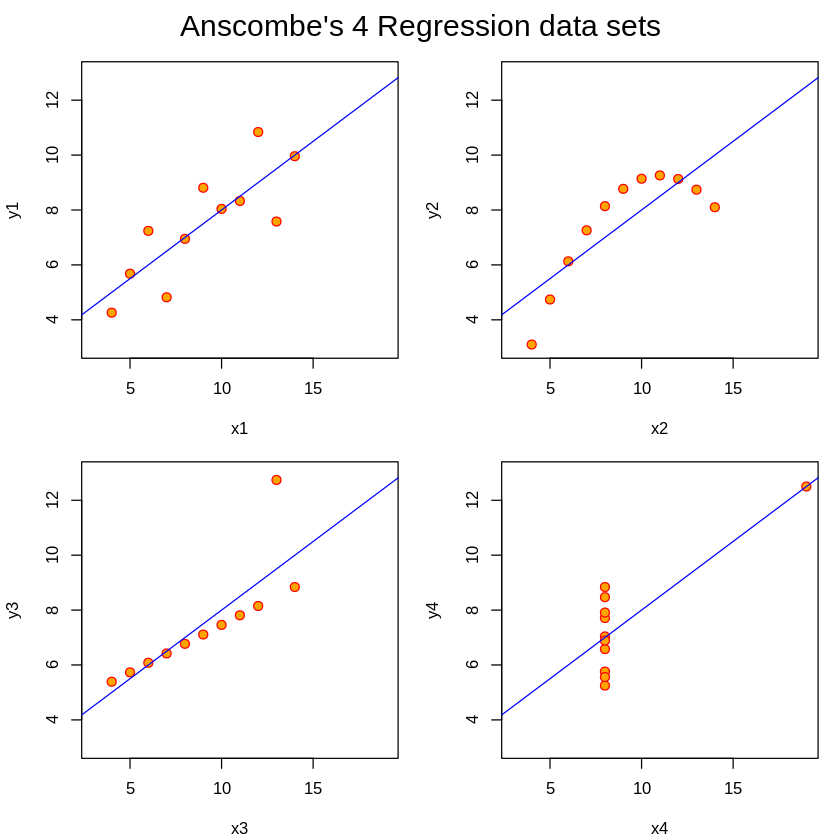

In [ ]:
# note, não é necessário você compreender os detalhes deste código aqui,
# o interesse está no gráfico produzido

require(stats); require(graphics)
summary(anscombe)

##-- now some "magic" to do the 4 regressions in a loop:
ff <- y ~ x
mods <- setNames(as.list(1:4), paste0("lm", 1:4))
for(i in 1:4) {
  ff[2:3] <- lapply(paste0(c("y","x"), i), as.name)
  ## or   ff[[2]] <- as.name(paste0("y", i))
  ##      ff[[3]] <- as.name(paste0("x", i))
  mods[[i]] <- lmi <- lm(ff, data = anscombe)
  print(anova(lmi))
}

## See how close they are (numerically!)
sapply(mods, coef)
lapply(mods, function(fm) coef(summary(fm)))

## Now, do what you should have done in the first place: PLOTS
op <- par(mfrow = c(2, 2), mar = 0.1+c(4,4,1,1), oma =  c(0, 0, 2, 0))
for(i in 1:4) {
  ff[2:3] <- lapply(paste0(c("y","x"), i), as.name)
  plot(ff, data = anscombe, col = "red", pch = 21, bg = "orange", cex = 1.2,
       xlim = c(3, 19), ylim = c(3, 13))
  abline(mods[[i]], col = "blue")
}
mtext("Anscombe's 4 Regression data sets", outer = TRUE, cex = 1.5)
par(op)

Você pode notar que, apesar dos quatro conjuntos de pontos poderem ser aproximados por mesma reta eles estão muito diferentemente organizados.

Quê conclusão pode tirar disso? Embora as estatísticas descritivas dos dados forneça uma ferramenta útil para descrever conjuntos de dados, ela não é suficiente para observarmos todos os padrões dos dados. É aqui que a visualização dos dados entra para colaborar no entendimento dos dados e você poder observar padrões e características dos dados que não são facilmente observáveis diretamente ou por estatísticas sobre os dados.

# Gráficos de Apresentação e de Exploração

Existe uma série de questões sobre a visaulização de dados, mas em primeiro lugar, há a questão de que fazemos *gráficos de apresentação* e *gráficos de exploração*. Criamos gráficos de apresentação quando queremos exibir os dados de uma forma limpa, atraente, e às vezes impactante, para torna mais fácil a comunicação de uma ideia ou resultado ao leitor, ou mesmo quando queremos convencê-lo de um resultado que o gráfico representa. Você pode pensar, por exemplo, nos inúmeros gráficos produzidos para 'explicar' a Pandemia de Covid-19 em 2020 ao público em geral, ou ainda nos gráficos produzidos para apresentar os resultados de uma empresa aos acionistas.

Igualmente importante, mas para nós aqui ainda mais importante, é produzir gráficos que irão ajudar você a entender melhor os dados. Produzir gráficos exploratórios ajudam você a aprender sobre os dados à medida que os analisa. Embora passamos dar bastante qualidade a esses gráficos, não daremos ênfase aqui na forma de 'apresentação' dos gráficos como cores, organização dos dados, combinação de múltiplos gráficos em uma única página, inserção de textos como títulos e rótulos, que são mais importantes quando produzimos gráficos de apresentação. Nosso foco será mais na exploração dos dados, mas você pode consultar as referências para a produção de gráficos mais elegantes se quiser.

# Buscando gráficos corretos

Antes de entrarmos nos comandos de R e você aprender a fazer diferentes tipos de gráficos, vamos entender o quê exatamente estamos buscando nos dados. Essa é uma pergunta essencial pois, a partir dela, é que podemos buscar o tipo de gráfico que queremos produzir e, então, buscar a melhor forma de produzir esse gráfico , seja em R ou qualquer outra linguagem (que comandos, parâmetros do gráfico etc.)

Quando você analisa um conjunto de dados você em geral vai estar buscando responder algumas perguntas. Por exemplo, você estar buscando entender a distribuição de renda ou de escolaridade entre os brasileiros a partir dos dados do IBGE, ou buscar a tendência das ações de bitcoin para os próximos anos. A visualização desses dados em gráficos permite, então, dar uma primeira resposta a essas perguntas que você poderá em seguida se aprofundar.

As perguntas que podemos fazer sobre os dados podem ser agrupadas em algumas categorias, cada uma delas tendo gráficos que são *mais frequentemente usados* para você obter e apresentar respostas à sua questão:

> **Evolução** (ou *Tendência dos Dados*): gráficos de linha, área, séries múltiplas

> **Distribuição**: histogramas, gráficos de distribuição de densidade, *boxplot*

> **Quantidades e Proporções**: gráficos de barras, *word cloud*, *spider*, *pie chart*

> **Relações**: gráficos de dispersão, *heat map*, *density 2D*

Havendo ainda gráficos mais especializados que envolvem para análises geográficas (*maps*), fluxo de dados em redes sociais e outros. Mas para estatística, vamos nos concentrar apenas nesse conjunto de gráficos que já serão tremendamente úteis.

Note que falamos em gráficos *mais frequentemente usados*, o quê não impede que empreguemos um gráfico de uma categoria para análise de outra em alguns casos.

Vamos ver alguns exemplos que mostrarão para você a importância dessas perguntas e da análise gráfica.

## Evolução

Em muitos dados nos interessam a evolução de uma variável com relação a outra. Por exemplo, a evolução da renda de um indivíduo ao longo dos anos, o descréscimo de fumantes (ou o aumento de veganos ;-)) ao longo do tempo, ou ainda o aumento do preço com relação ao aumento da demanda de um produto. Quando uma dessas variáveis é uma variável de tempo, temos uma série temporal. Nesses casos, frequentemente, você quer saber sobre a tendência dessa evolução, sobre a probabilidade de se alcançar um valor, ou ainda comparar a forma de evolução de duas variáveis no tempo.

Quando essas variáveis são numéricas, um gráfico de linhas é frequentemente usado para visualizar a tendência dos dados e responder essas perguntas.

O gráfico a seguir exibe o comportamento de um conjunto de índices da bolsa de São Paulo nos primeiros meses de 2020 e você pode notar a tendência de perda de valor das ações VALE3, PETR4 e IBOV ao longo do tempo em virtude da pandemia de COVID 19 neste ano, e a consequente valorização do Dólar no período.

Aproveite para examinar a sintaxe e o uso do comando plot:

`plot(df$x, df$y, main='titulo', xlim=c(min,max), xlabel='rotulo x' ylim=c(min,max), ylabel='rotulo x', type = 'l')`

O `plot()` produz um gráfico de linhas $x \times y$ e os parâmetros indicam os limites de cada eixo, título do gráfico e rótulos. O parâmetro `type` indicando o tipo de linha a empregado e você pode querer experimentar os seus diferentes valores `c("p","l","o","b","c","s","S","h")`.

Considere a base.

In [ ]:
df = read.csv('http://meusite.mackenzie.br/rogerio/TIC/mystocksn.csv')
head(df)

,data,IBOV,VALE3,PETR4,DOLAR
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,2020-01-02,118573,13.45,16.27,4.0163
2,2020-01-03,117707,13.29,15.99,4.0234
3,2020-01-06,116878,13.14,16.22,4.0570
4,2020-01-07,116662,13.23,16.06,4.0604
5,2020-01-08,116247,13.22,15.70,4.0662
6,2020-01-09,115947,12.99,15.75,4.0628


Antes de plotar os valores vamos converter os dados de data para formato data.

In [ ]:
df$data = as.Date(df$data)

plot dos valores (x,y)

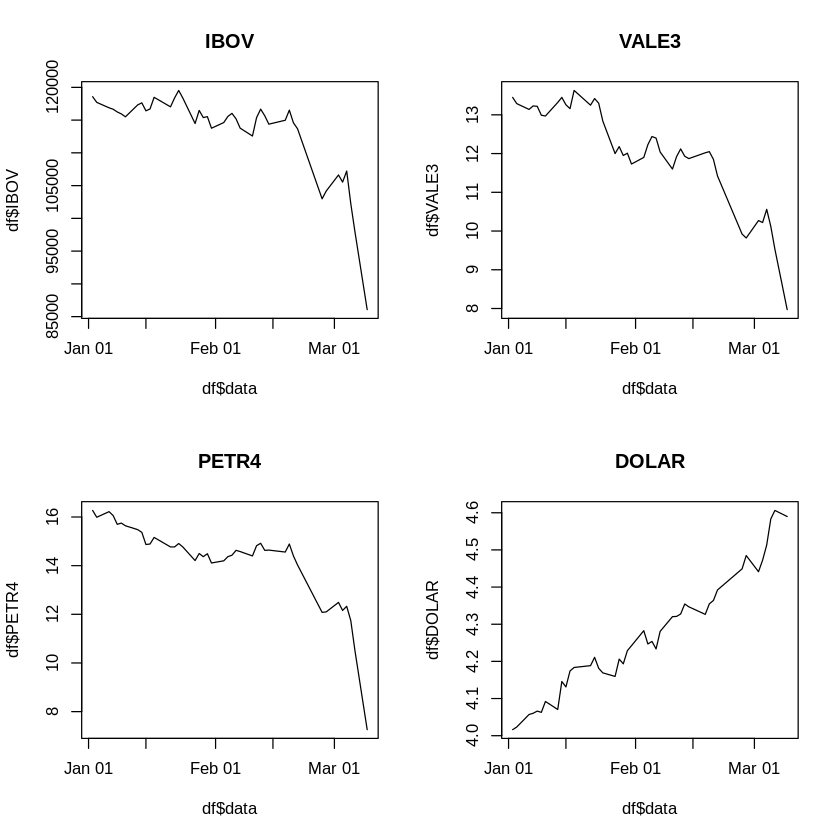

In [ ]:
par(mfrow = c(2, 2))     # este comando apenas permite exibir os 4 gráficos em uma única página

plot(df$data,df$IBOV,type='l',main='IBOV')
plot(df$data,df$VALE3,type='l',main='VALE3')
plot(df$data,df$PETR4,type='l',main='PETR4')
plot(df$data,df$DOLAR,type='l',main='DOLAR')

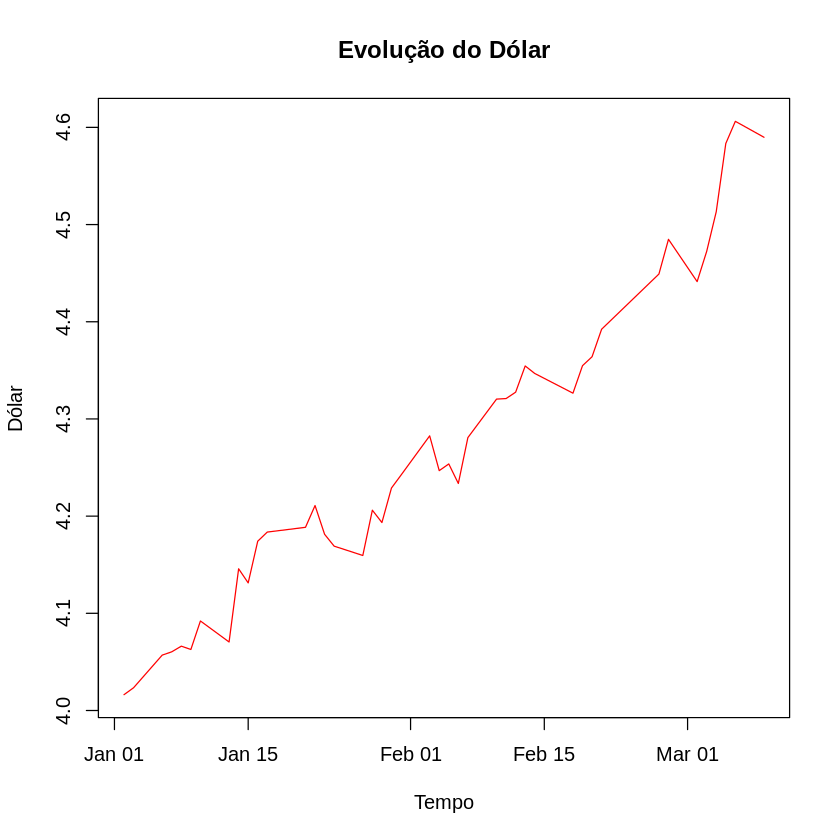

In [ ]:
plot(df$data,df$DOLAR, main='Evolução do Dólar',xlab='Tempo',ylab='Dólar',type='l',col='red')
# help(plot)

Você pode querer também exibir mais um gráfico de linha no mesmo gráfico e comparar diferentes séries de dados. Para isso você pode empregar o comando `lines`, que adiciona linhas a um comando `plot` anterior, mas sem criar um novo gráfico. Veja também a adição de cores e legendas que podem ser úteis em gráficos de apresentação mais elaborados.

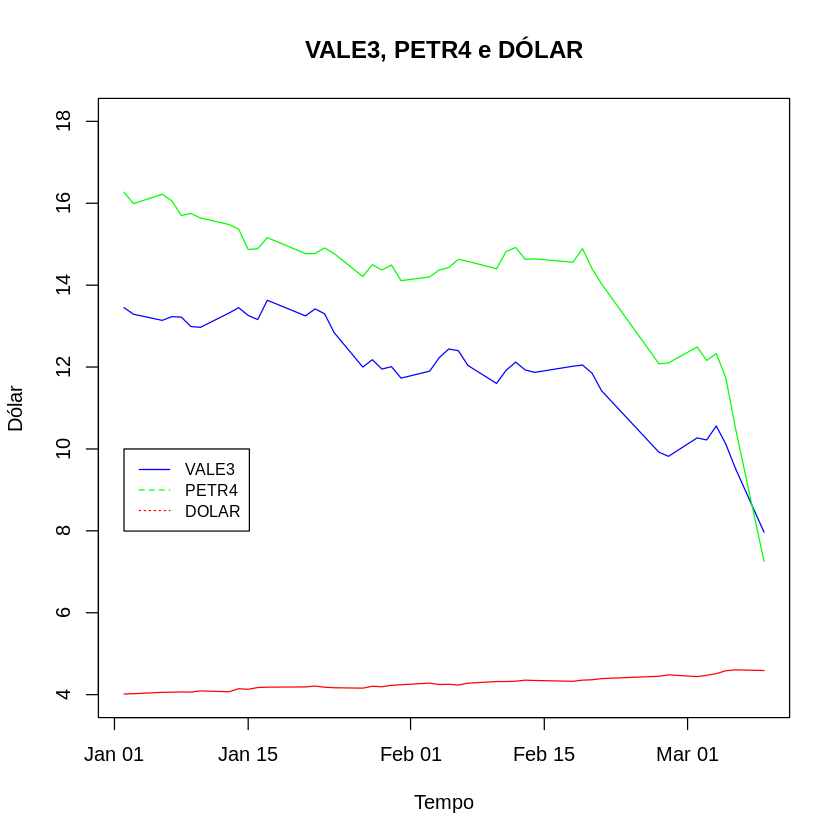

In [ ]:
plot(df$data,df$VALE3, type='l',col='blue',ylim=c(4,18),xlab='Tempo',ylab='Dólar')

lines(df$data,df$PETR4, type='l',col='green')
lines(df$data,df$DOLAR, type='l',col='red')

title("VALE3, PETR4 e DÓLAR")

legend(as.Date('2020-01-02'), 10,               # posição x, y da lengenda no gráfico
       legend=c('VALE3','PETR4','DOLAR'),       # lengendas
       col=c('blue','green','red'),
       lty=1:3,
       cex=0.8)

Como você pode ver gráficos de linha são úteis para observarmos a evolução, ou tendência dos dados, de uma variável com relação a outra, ou mesmo para compararmos a evolução de duas ou mais variáveis.

## Distribuição

Veremos mais sobre distribuições no próximo capítulo mas, basicamente, a distribuição de uma variável refere-se a quantidade de vezes que uma dos valores dessa variável aparece nos dados.

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


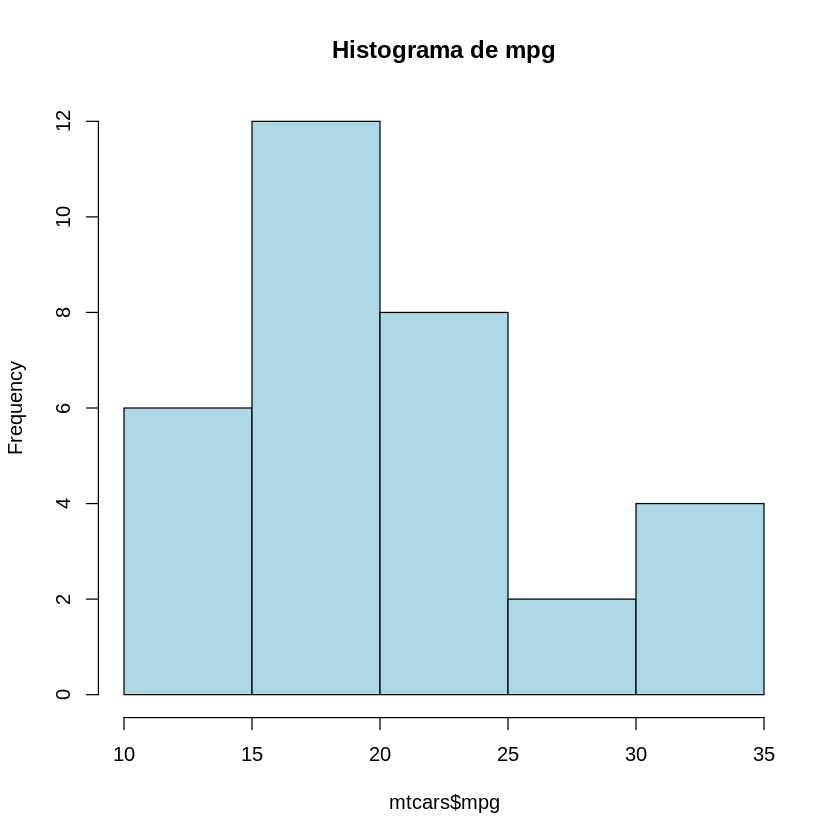

In [ ]:
head(mtcars)
hist(mtcars$mpg, main='Histograma de mpg',col='lightblue')

O gráfico acima mostra a distribuição dos valores de `mtcars$mpg` em `mtcars`. Existem 6 veículos com valores de `mpg` entre $]10,15[$, 12 veículos entre $[15,20[$, 8 entre $[20,2[$ etc. Esse gráfico é um histograma e denominamos as quantidades de um valor, ou intervalo de valores, de **frequência dos valores**.

Uma outra forma bastante comum de exibir essas distribuições é empregarmos gráficos de *densidade de probabilidade*. `mtcars` tem 32 casos e você pode notar então que a probabilidade de veículos com valores de `mpg` entre $]10,15[$ é 6/32, veículos entre $[15,20[ 12/32$, veículos entre $[20,2[$ 8/32 etc. e a probabilidade de todos esse valores tem soma 1. Um gráfico de densidade de probabilidade é um gráfico que, no lugar da frequencia dos valores, exibe essas probabilidades e tem sua área sob o gráfico igual a 1 (a soma de todas probabilidades).

In [ ]:
# densityplot(mtcars$mpg, main='Densidade de Probabilidades de mpg',lwd=2)  # lwd é line witdh, a largura da linha

Você deve estar acostumado a gráficos de duas dimensões do tipo $x \times y$, como aparecem frequentemente na matemática. É exatamente o que vimos no `plot()` em que empregamos duas variáveis, ou duas dimensões, `plot(x,y)`. Note que nos histogramas, ou nos gráficos de densidade, *uma única variável é informada*. De fato, histogramas e gráficos de densidade são gráficos em que exibimos uma *única variável em duas dimensões*: seus valores e sua frequencia ou probabilidade de valores. Isso é particularmente importante para que você diferencie principalmente histogramas de outros gráficos de barras (uma confusão bastante comum).

Agora que você entendeu o que é a distribuição de uma variável podemos partir para um exemplo mais interessante. O conjunto Os dados a seguir foram obtidos da **WHO World Health Organization** - Life expectancy and Healthy life expectancy. Eles apresentam indicadores de saúde de diversos países como o índice de massa corpórea médio da população (BMI), a expectativa de vida e índices de mortalidade. Uma pergunta relevante sobre a saúde global que você poderia fazer é sobre a distribuição desses índices entre os países.

Vamos considerar no conjunto de dados apenas os dados do ano mais recente.

In [ ]:
df = read.csv('http://meusite.mackenzie.br/rogerio/TIC/Life_Expectancy_Data.csv')
df = df[df$Year == max(df$Year),]
head(df)

,Country,Year,Status,Life.expectancy,Adult.Mortality,infant.deaths,Alcohol,percentage.expenditure,Hepatitis.B,Measles,⋯,Polio,Total.expenditure,Diphtheria,HIV.AIDS,GDP,Population,thinness..1.19.years,thinness.5.9.years,Income.composition.of.resources,Schooling
,<chr>,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,⋯,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,2015,Developing,65.0,263,62,0.01,71.27962,65,1154,⋯,6,8.16,65,0.1,584.2592,33736494,17.2,17.3,0.479,10.1
17,Albania,2015,Developing,77.8,74,0,4.60,364.97523,99,0,⋯,99,6.00,99,0.1,3954.2278,28873,1.2,1.3,0.762,14.2
33,Algeria,2015,Developing,75.6,19,21,NA,0.00000,95,63,⋯,95,NA,95,0.1,4132.7629,39871528,6.0,5.8,0.743,14.4
49,Angola,2015,Developing,52.4,335,66,NA,0.00000,64,118,⋯,7,NA,64,1.9,3695.7937,2785935,8.3,8.2,0.531,11.4
65,Antigua and Barbuda,2015,Developing,76.4,13,0,NA,0.00000,99,0,⋯,86,NA,99,0.2,13566.9541,NA,3.3,3.3,0.784,13.9
81,Argentina,2015,Developing,76.3,116,8,NA,0.00000,94,0,⋯,93,NA,94,0.1,13467.1236,43417765,1.0,0.9,0.826,17.3


Podemos notar então, por exemplo, que a expectativa de vida mais frequente entre os países está entre 70 e 75 anos, ou ainda que a maior parte dos países tem expectativa de vida acima de 70 anos.

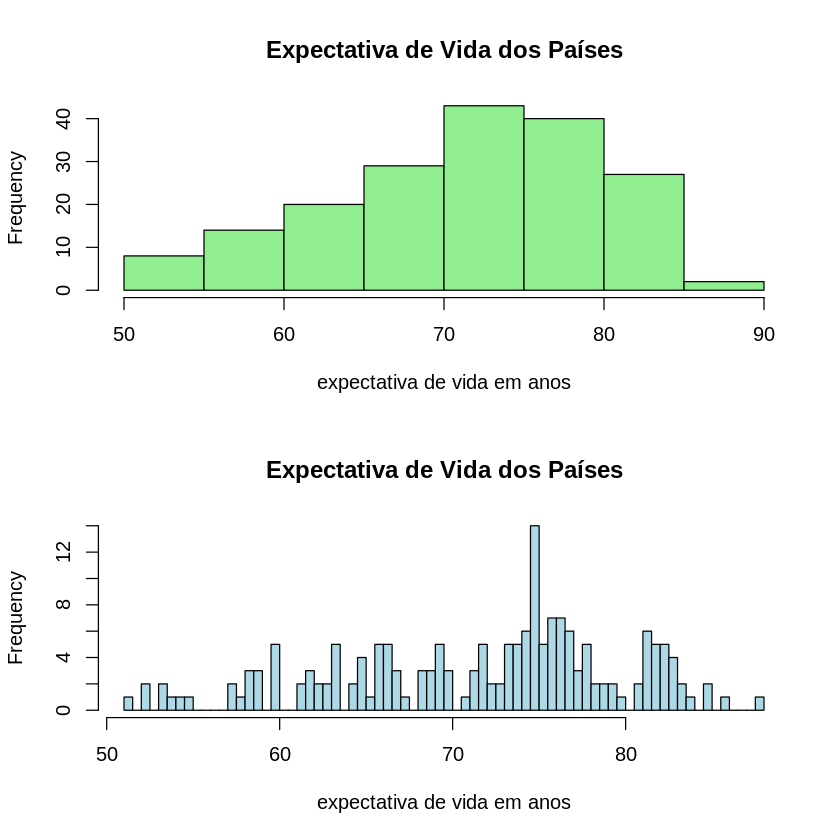

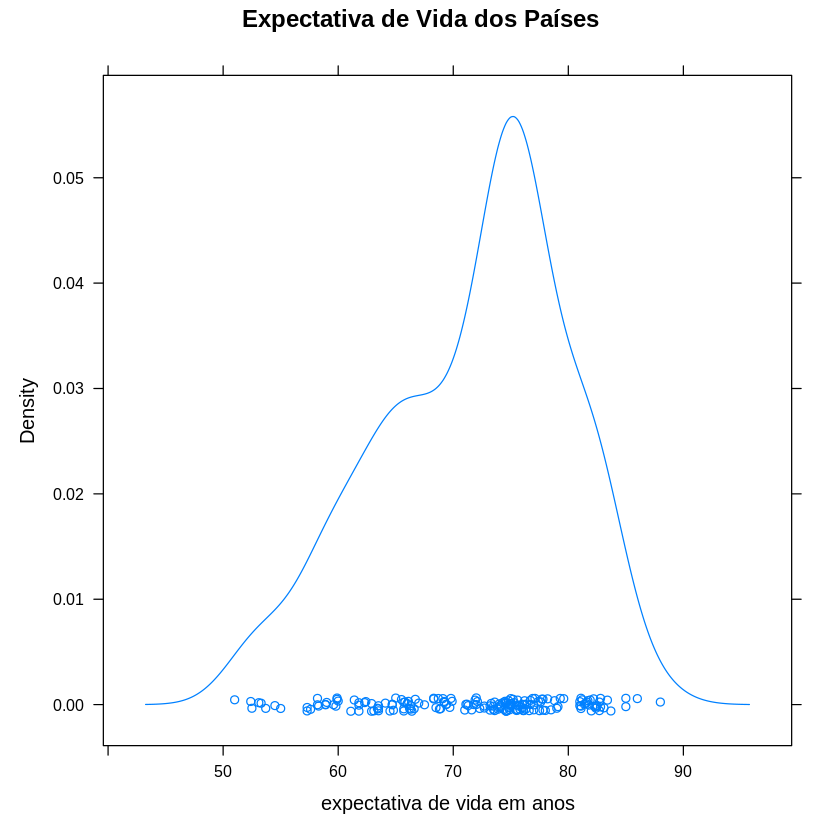

In [ ]:
library(lattice)
par(mfrow = c(2, 1))

hist(df$Life.expectancy, main='Expectativa de Vida dos Países' ,
     xlab='expectativa de vida em anos', col = "lightgreen",)
hist(df$Life.expectancy, main='Expectativa de Vida dos Países',
     breaks = 100, col = "lightblue",                             # cria 100 faixas de dados no histograma
     xlab='expectativa de vida em anos')

densityplot(df$Life.expectancy, main='Expectativa de Vida dos Países',
            xlab='expectativa de vida em anos')

Uma forma comum de exibirmos gráficos de densidade é preenchendo a área sob a curva e, dentre muitas outras formas, podemos fazer isso do seguinte modo.

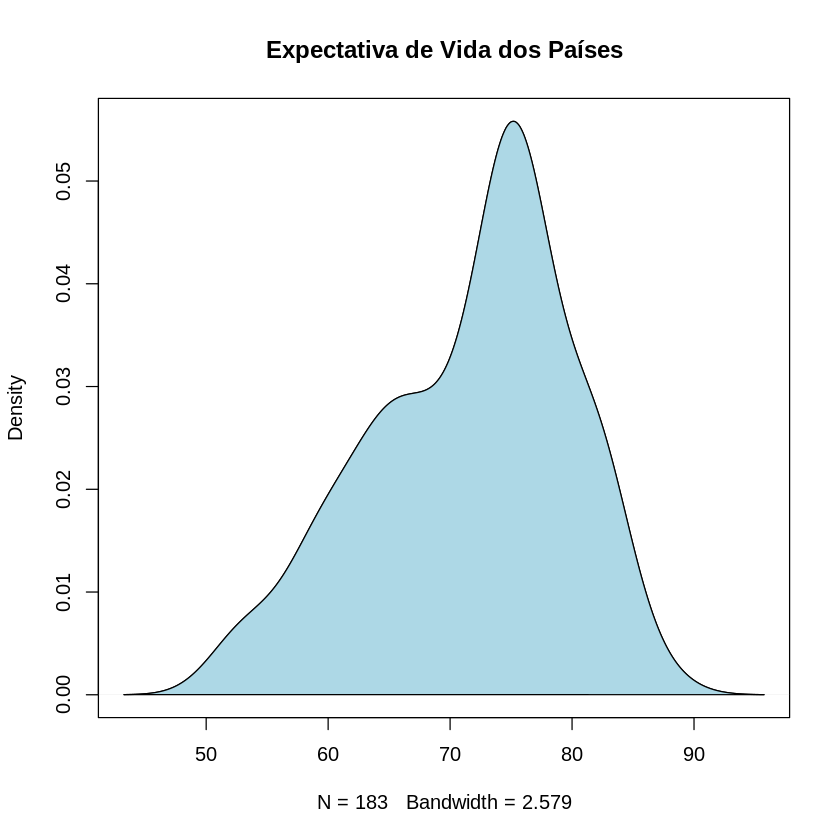

In [ ]:
d = density(df$Life.expectancy,na.rm = TRUE)             # na.rm remove dados faltantes da base
plot(d, main='Expectativa de Vida dos Países')
polygon(d, col="lightblue", border="black")

E podemos ainda comparar a distribuição de expectativa de vida entre os países desenvolvidos e em desenvolvimento, e não será surpresa para você observar que a expectativa de vida nos países desenvolvidos é cerca de 10 anos superior a dos países em desenvolvimento!

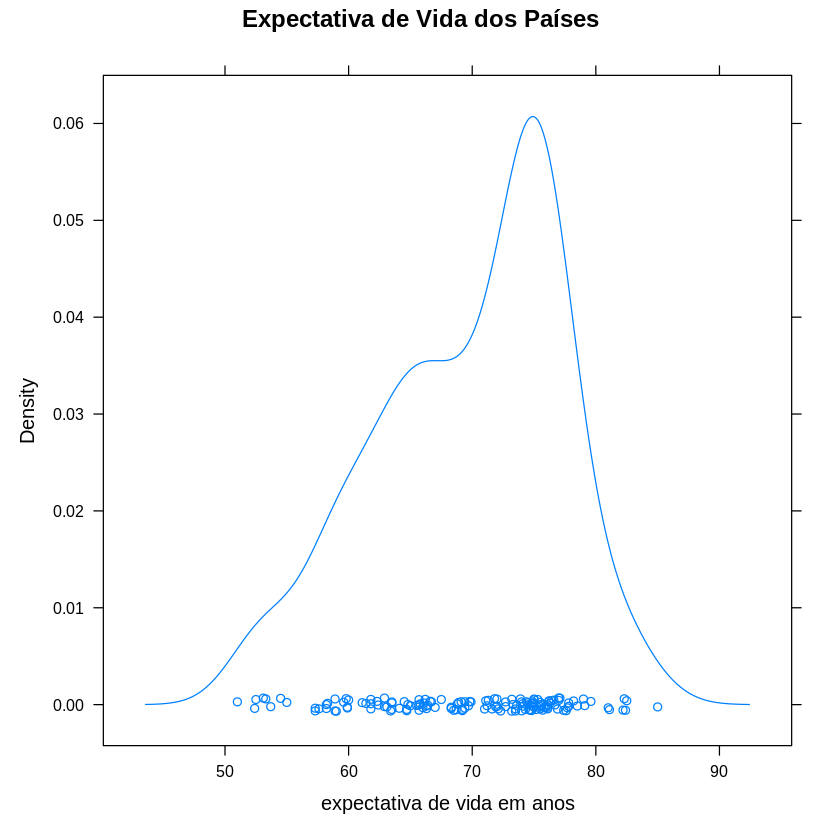

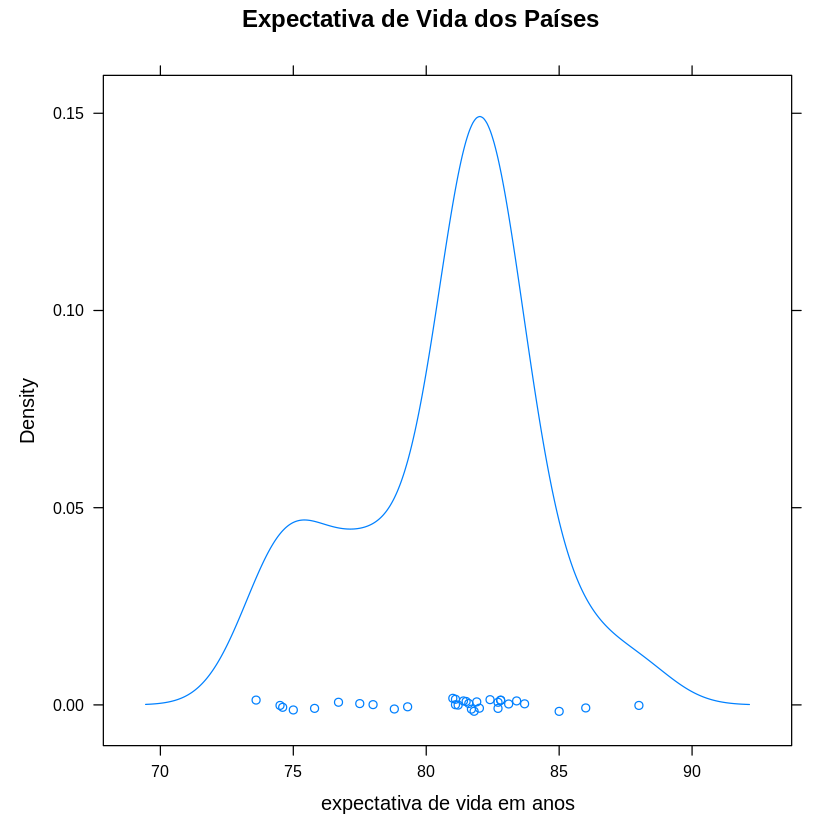

In [ ]:
densityplot(df[df$Status == 'Developing',]$Life.expectancy, main='Expectativa de Vida dos Países',
            xlab='expectativa de vida em anos')
densityplot(df[df$Status != 'Developing',]$Life.expectancy, main='Expectativa de Vida dos Países',
            xlab='expectativa de vida em anos')

Uma forma sintética de exibir essas distribuições é a partir dos gráficos de caixa ou *boxplot*. Os quartis, que você estudou no capítulo anterior, são uma forma sintética de representar as distribuições dos dados e é basicamente o que exibem os gráficos de caixa.

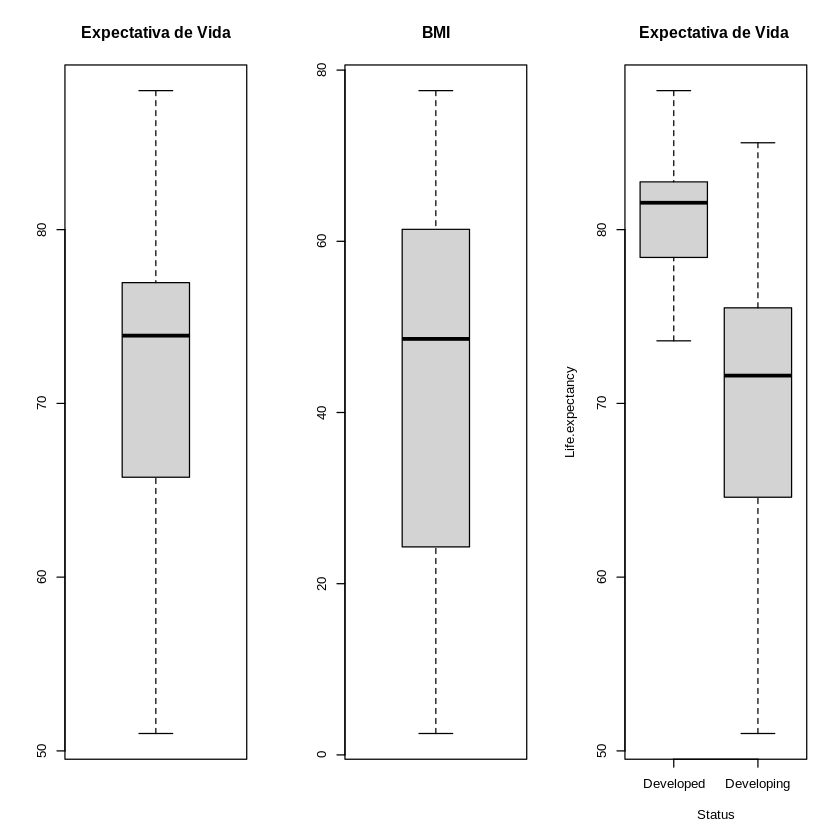

In [ ]:
par(mfrow = c(1, 3))
boxplot(df$Life.expectancy,main='Expectativa de Vida')
boxplot(df$BMI,main='BMI')
boxplot(Life.expectancy ~ Status,data=df,main="Expectativa de Vida ")

E para entender o gráfico acima podemos recorrer a figura que empregamos no capítulo 2:

<img src="http://meusite.mackenzie.br/rogerio/TIC/boxplotIQR.png" width=500, align="center"></a>

e gráficos de caixa também são úteis para detecção de outliers (eles aparecem como pontos acima/abaixo das linhas dos valores máximo/mínimo dos dados).

Como você pôde notar aqui a distribuição dos dados diz muito sobre uma variável. Aqui você aprendeu somente a exibir e analisar graficamente essas distribuições e você ira aprender muito mais no capítulo seguinte.

## Quantidades e Proporções

Aqui estamos interessados em entender a 'composição' ou as partes de um conjunto de dados. Entender as quantidades e proporções de cada parte, as diferentes categorias de uma variável, os diferentes valores de variáveis para diferentes categorias etc. Gráficos de barras e *pizza* são particularmente úteis para isso.

Considere a base `mtcars.

In [ ]:
library(MASS)
# help(Cars93)
head(Cars93)

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,⋯,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>,<fct>,<fct>,⋯,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<fct>,<fct>
1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,⋯,5,177,102,68,37,26.5,11,2705,non-USA,Acura Integra
2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,⋯,5,195,115,71,38,30.0,15,3560,non-USA,Acura Legend
3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,⋯,5,180,102,67,37,28.0,14,3375,non-USA,Audi 90
4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,⋯,6,193,106,70,37,31.0,17,3405,non-USA,Audi 100
5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,⋯,4,186,109,69,39,27.0,13,3640,non-USA,BMW 535i
6,Buick,Century,Midsize,14.2,15.7,17.3,22,31,Driver only,Front,⋯,6,189,105,69,41,28.0,16,2880,USA,Buick Century


O comando `table()` fornece a frequencia de valores (quantidades) para cada um dos pares de valores informados. Podemos exibir, então, cada um desses valores representados pela altura das barras no gráfico.

         
           3  4  5  6  8 rotary
  USA      0 22  0 20  6      0
  non-USA  3 27  2 11  1      1
        
         4WD Front Rear
  3        1     2    0
  4        4    41    4
  5        0     2    0
  6        5    20    6
  8        0     2    5
  rotary   0     0    1


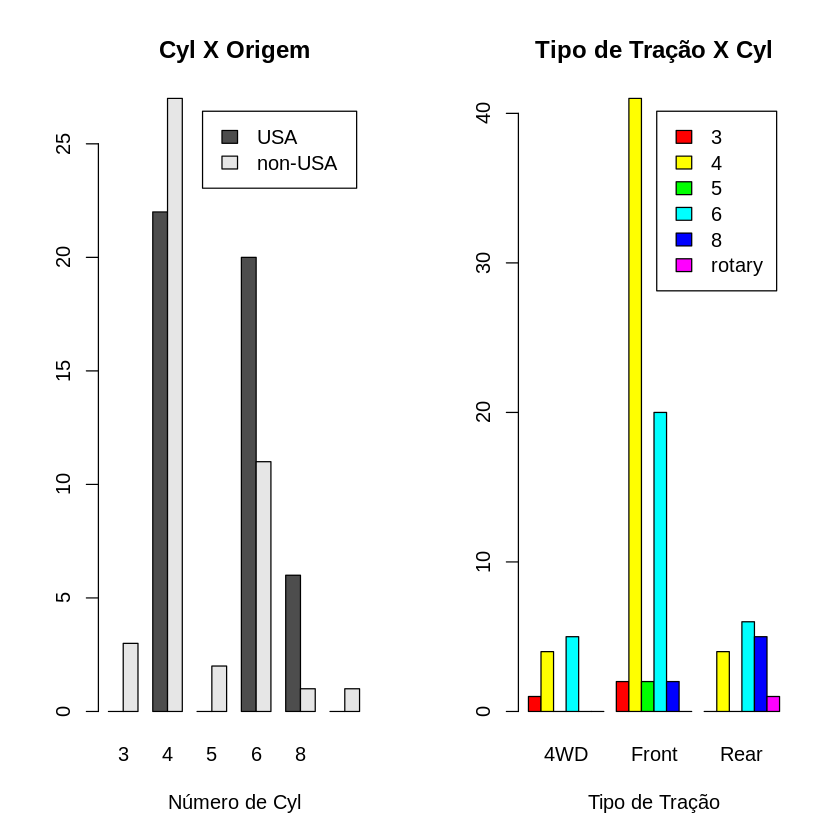

In [ ]:
par(mfrow = c(1, 2))

counts1 = table( Cars93$Origin, Cars93$Cylinders)

print(counts1)

barplot(counts1, main="Cyl X Origem",
  xlab="Número de Cyl",
  legend = rownames(counts1),
  beside=TRUE) # barras uma do lado da outra

counts2 = table(Cars93$Cylinders , Cars93$DriveTrain)

print(counts2)

barplot(counts2, main="Tipo de Tração X Cyl",
  xlab="Tipo de Tração",
  legend = rownames(counts2),
  beside=TRUE,
  col=rainbow(6)) # fornece 6 cores diferentes

Você pode, então, explorar a 'composição' desse conjunto de veículos notando, por exemplo, que somente encontramos veículos fabricados fora dos Estados Unidos para com número de cilindros ímpares (ou ainda do tipo *rotary*), ou que a maior predomiância nos dados é de veículos de 4 cilindros com tração dianteira.

E a mesma informação pode ser exibida com barras sobrepostas (*stacked bar plot*) o que pode ser interessante e alguns casos. Para isso basta você tirar o parâmetro `beside` dos comandos acima.

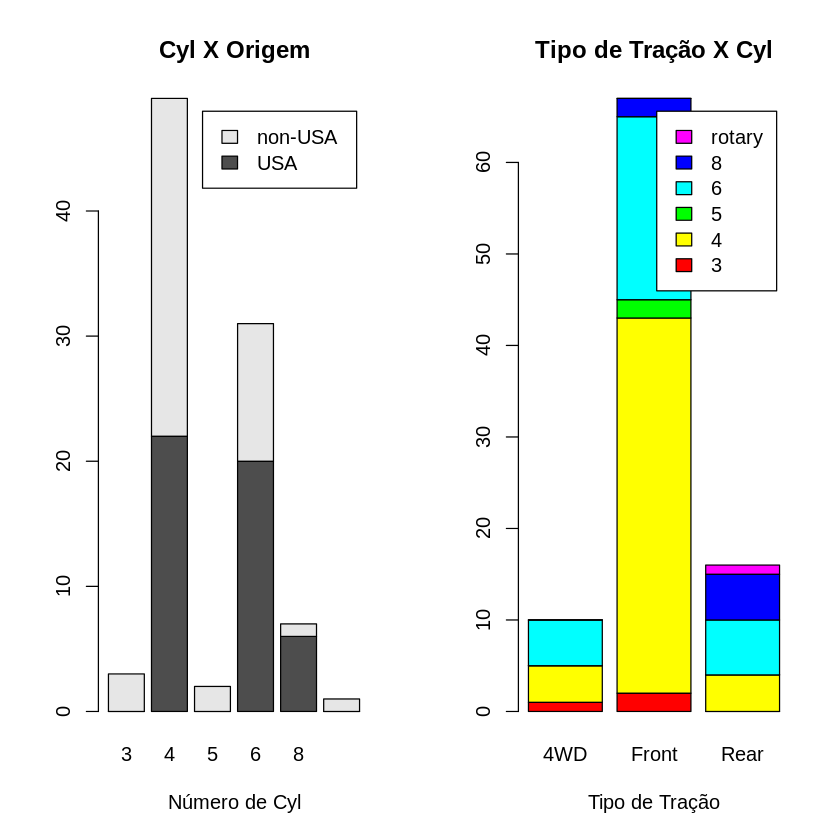

In [ ]:
par(mfrow = c(1, 2))

counts1 = table( Cars93$Origin, Cars93$Cylinders)
barplot(counts1, main="Cyl X Origem",
  xlab="Número de Cyl",
  legend = rownames(counts1))

counts2 = table(Cars93$Cylinders , Cars93$DriveTrain)
barplot(counts2, main="Tipo de Tração X Cyl",
  xlab="Tipo de Tração",
  legend = rownames(counts2),
  col=rainbow(6)) # fornece 6 cores diferentes

Gráficos de barras não exibem somente frequência de valores (que obtevemos com o comando `table()`acima), eles podem ser empregados para exibir quaiquer quantidades e  são particularmente úteis na comparação de valores. Abaixo produzimos os valores médios dos veículos por tipo de tração e origem, e podemos então exibir e comparar esses valores.

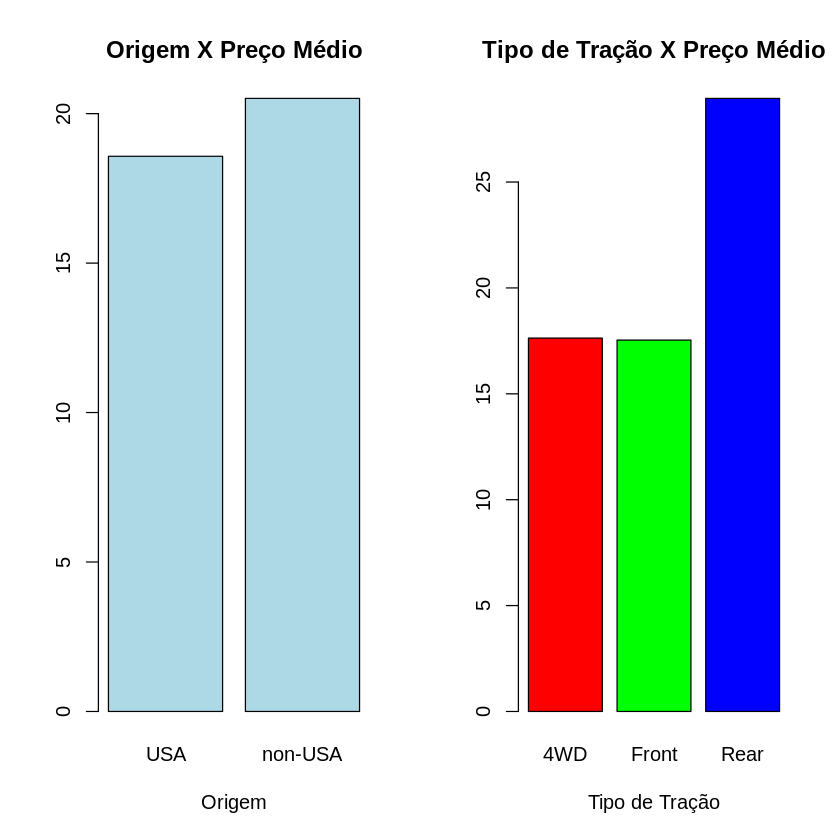

In [ ]:
par(mfrow = c(1, 2))

valoresUS = c(mean( Cars93[Cars93$Origin == 'USA',]$Price ),
            mean( Cars93[Cars93$Origin != 'USA',]$Price ))

barplot(valoresUS, main="Origem X Preço Médio",
  xlab="Origem",
  names.arg = c('USA','non-USA'),
  col='lightblue')


valoresTracao = c(mean( Cars93[Cars93$DriveTrain == '4WD',]$Price ),
            mean( Cars93[Cars93$DriveTrain == 'Front',]$Price ),
            mean( Cars93[Cars93$DriveTrain == 'Rear',]$Price ))

barplot(valoresTracao, main="Tipo de Tração X Preço Médio",
  xlab="Tipo de Tração",
  names.arg = c('4WD','Front','Rear'),
  col=rainbow(3))

Existem formas mais simples em R de se obter os valores por grupos de dados, mas aqui nos limitamos a empregar comandos que você já conhece.

Os gráficos de *pizza* também podem ser empregados mas, em geral, gráficos de barra desempenham a mesma função e são mais fáceis de serem interpretados.

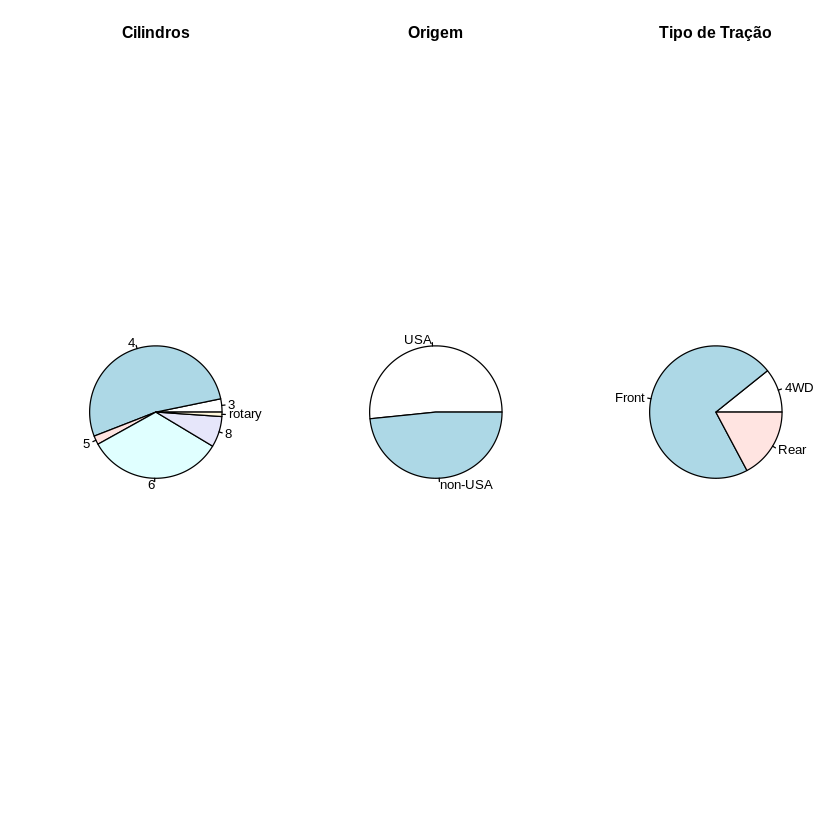

In [ ]:
par(mfrow = c(1, 3))

pie(table(Cars93$Cylinders), main='Cilindros')
pie(table(Cars93$Origin), main='Origem')
pie(table(Cars93$DriveTrain), main='Tipo de Tração')

O `dotchart` é um gráfico bastante especializado mas que pode substituir um gráfico de barras nos casos em que muitos valores são exibidos. Você pode comparar os dois gráficos abaixo e notar que para um maior número de casos o `dotchart` fornece uma visualização mais limpa.

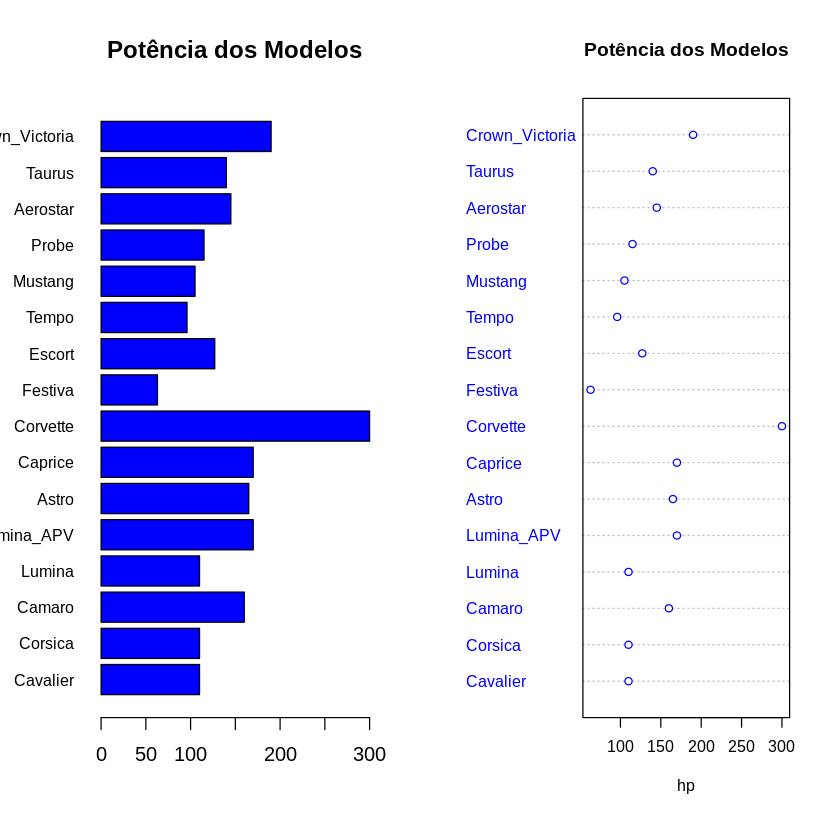

In [ ]:
par(mfrow = c(1, 2))

barplot(Cars93[Cars93$Manufacturer %in% c('Ford','Chevrolet'),]$Horsepower,
         names.arg = Cars93[Cars93$Manufacturer %in% c('Ford','Chevrolet'),]$Model,
         col='blue',
         horiz = T, las=1, # barras e seus labels na horizontal
         main="Potência dos Modelos",
         cex.names = 0.8)

dotchart(Cars93[Cars93$Manufacturer %in% c('Ford','Chevrolet'),]$Horsepower,
         labels=Cars93[Cars93$Manufacturer %in% c('Ford','Chevrolet'),]$Model,
         cex=0.8,col='blue',
   main="Potência dos Modelos",
   xlab="hp")

## Relações

Relações entre os dados são muitas vezes a parte mais importante dentre as descobertas que buscamos nos dados. Essas relações são denominadas de modo geral como correlações. Mas, como você viu no capítulo anterior, a correlação estatística tem um significado muito mais específico e, em geral, está associada a correlação linear. Essa é em geral a primeira relação que buscamos entre variáveis numéricas pois permite, como veremos no capítulo 7 mais adiante, aplicarmos métodos de regressão linear para inferência de valores. Graficamente, entretanto, estamos livres para buscar quaisquer relações entre os dados, sejam elas lineares ou não.

O gráfico `pairs()` do R é útil por exibir um *gráfico de dispersão* de todos os pares de variáveis de um dataframe. Um gráfico de dispersão, ou *scatter plot*, é um gráfico $x \times y$ onde, diferentemente de uma função podemos ter vários valores de $y$ para um mesmo valor de $x$. Um gráfico de dispersão é obtido com o mesmo comando `plot(x,y)`, mas sem produzir uma *linha* entre os pontos (pois haveria vários pontos para um mesmo $x$). Ele representa assim como se distribuem os valores de uma variável com relação a outra, ou sua dispersão.

Vamos empregar o mesmo conjunto de dados anterior, da **WHO World Health Organization** - Life expectancy and Healthy life expectancy e selecionar somente os dados mais recentes.

,Country,Year,Status,Life.expectancy,Adult.Mortality,infant.deaths,Alcohol,percentage.expenditure,Hepatitis.B,Measles,⋯,Polio,Total.expenditure,Diphtheria,HIV.AIDS,GDP,Population,thinness..1.19.years,thinness.5.9.years,Income.composition.of.resources,Schooling
,<chr>,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,⋯,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,2015,Developing,65.0,263,62,0.01,71.27962,65,1154,⋯,6,8.16,65,0.1,584.2592,33736494,17.2,17.3,0.479,10.1
17,Albania,2015,Developing,77.8,74,0,4.60,364.97523,99,0,⋯,99,6.00,99,0.1,3954.2278,28873,1.2,1.3,0.762,14.2
33,Algeria,2015,Developing,75.6,19,21,NA,0.00000,95,63,⋯,95,NA,95,0.1,4132.7629,39871528,6.0,5.8,0.743,14.4
49,Angola,2015,Developing,52.4,335,66,NA,0.00000,64,118,⋯,7,NA,64,1.9,3695.7937,2785935,8.3,8.2,0.531,11.4
65,Antigua and Barbuda,2015,Developing,76.4,13,0,NA,0.00000,99,0,⋯,86,NA,99,0.2,13566.9541,NA,3.3,3.3,0.784,13.9
81,Argentina,2015,Developing,76.3,116,8,NA,0.00000,94,0,⋯,93,NA,94,0.1,13467.1236,43417765,1.0,0.9,0.826,17.3


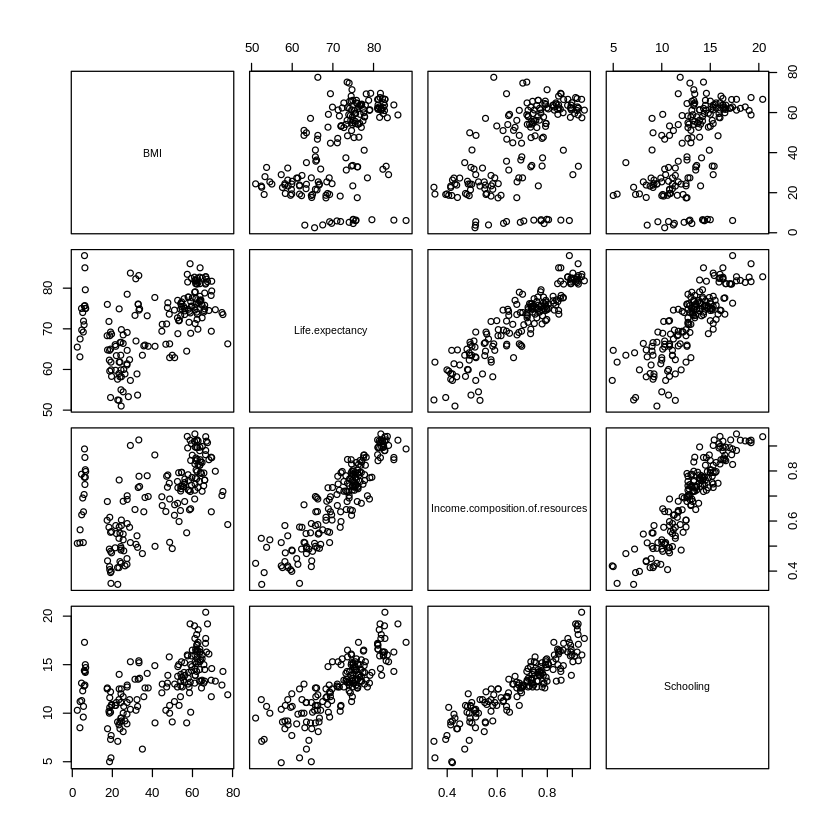

In [ ]:
df = read.csv('http://meusite.mackenzie.br/rogerio/TIC/Life_Expectancy_Data.csv')
df = df[df$Year == max(df$Year),]
head(df)

pairs(df[ ,c('BMI','Life.expectancy','Income.composition.of.resources','Schooling')])

A rigor esse não é um gráfico, mas vários gráficos combinados, e você pode notar, por exemplo, a proximidade de uma reta para a relação entre Expectativa de Vida e Renda (por simplicidade chamaremos income.composition.of.resource simplesmente de Renda), ou ainda Renda e Escolaridade. O que não ocorre em nenhum caso para o BMI (índice de massa corporal médio das populações).

Você pode notar, por exemplo, a proximidade de uma reta para a relação entre Expectativa de Vida e Renda (por simplicidade chamaremos income.composition.of.resource simplesmente de Renda), ou ainda Renda e Escolaridade. O que não ocorre em nenhum caso para o BMI (índice de massa corporal médio das populações).

Uma vez identificados um ou mais pares de interesse, podemos empregar o comando `plot()` para exibir o gráfico de dispersão dessas variáveis. Você pode ainda adicionar uma linha de regressão para enfatizar a relação das variáveis, mas você não precisa se preocupar com isso agora.

Warning message in lsfit(df$Income.composition.of.resources, df$Life.expectancy):
“10 missing values deleted”


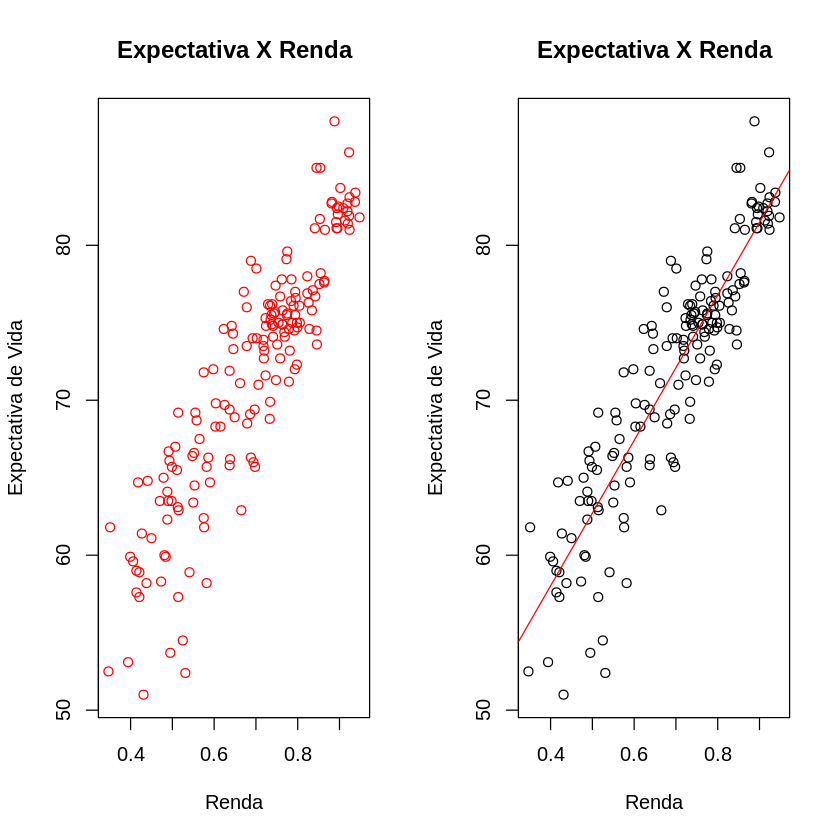

In [ ]:
par(mfrow = c(1, 2))

plot(df$Income.composition.of.resources, df$Life.expectancy,
     main='Expectativa X Renda',xlab='Renda',ylab='Expectativa de Vida', col='red')

plot(df$Income.composition.of.resources, df$Life.expectancy,
     main='Expectativa X Renda',xlab='Renda',ylab='Expectativa de Vida')

abline(lsfit(df$Income.composition.of.resources, df$Life.expectancy),col='red')

E como falamos, muitas vezes podemos empregar um gráfico mais frequentemente empregado para uma categoria de perguntas em outra. Aqui empregamos um `boxplot()` para examinar a relação entre Renda e Escolaridade. A sintaxe $y \leftarrow x$ no comando indica a variável preditora $x$ e variável dependente $y$.

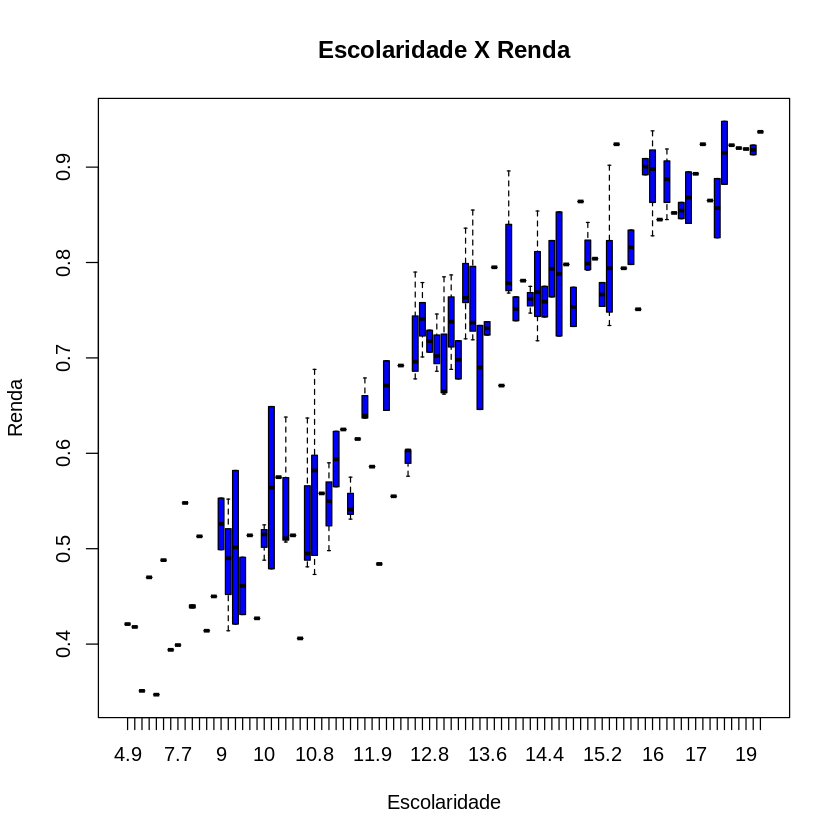

In [ ]:
boxplot(df$Income.composition.of.resources ~ df$Schooling,
        xlab="Escolaridade", ylab="Renda",main='Escolaridade X Renda',
        col='blue')

Uma outra forma útil e comum de buscarmos essas relações é o uso de um mapa de calor (*heat map*) do valor da correlações entre as variáveis de interesse. Antes de fazermo com os dados de WHO veja aqui um exemplo simples.

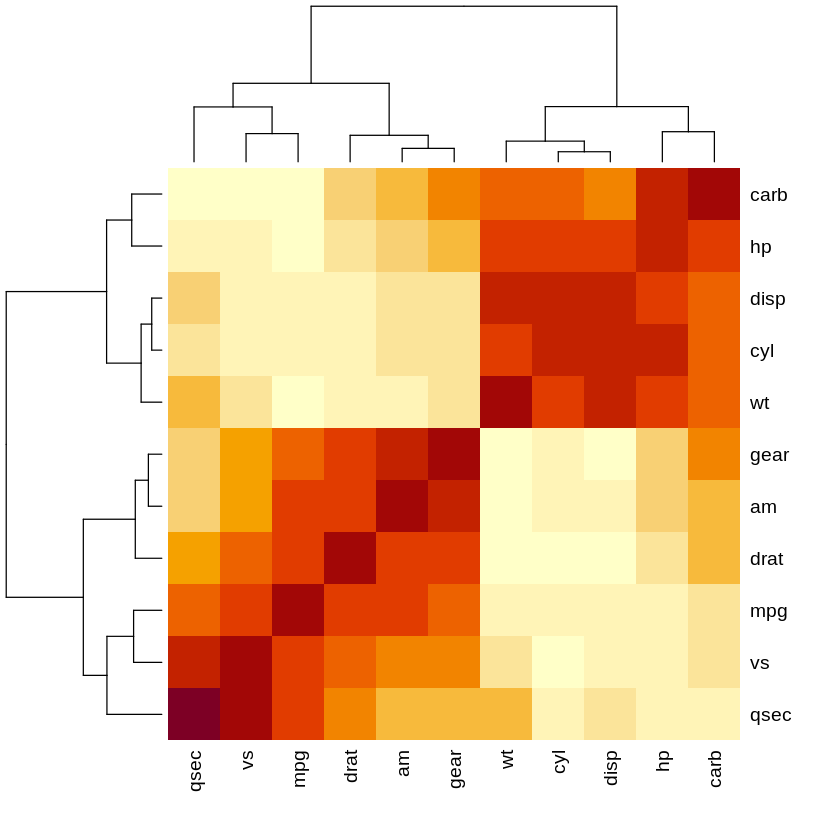

In [ ]:
data = signif(cor(mtcars),2)
heatmap(data)

O comando `cor()`, como vimos no capítulo anterior, retorna a correlação (coeficiente de Pearson) para todos os pares de valores. O `heat map()` então, exibe em um gráfico, a intensidade dos valores de correlação para cada par. Você pode notar, por exemplo, que hp, cyl e carb, todos atributos associados a uma maior potência dos veículos apresentam uma correlação bastante maior representado por cores mais escuras no gráfico.

Do mesmo modo podemos exibir a correlação dos dados da base WHO e notar a maior correlação de Renda e Escolaridade por exemplo.

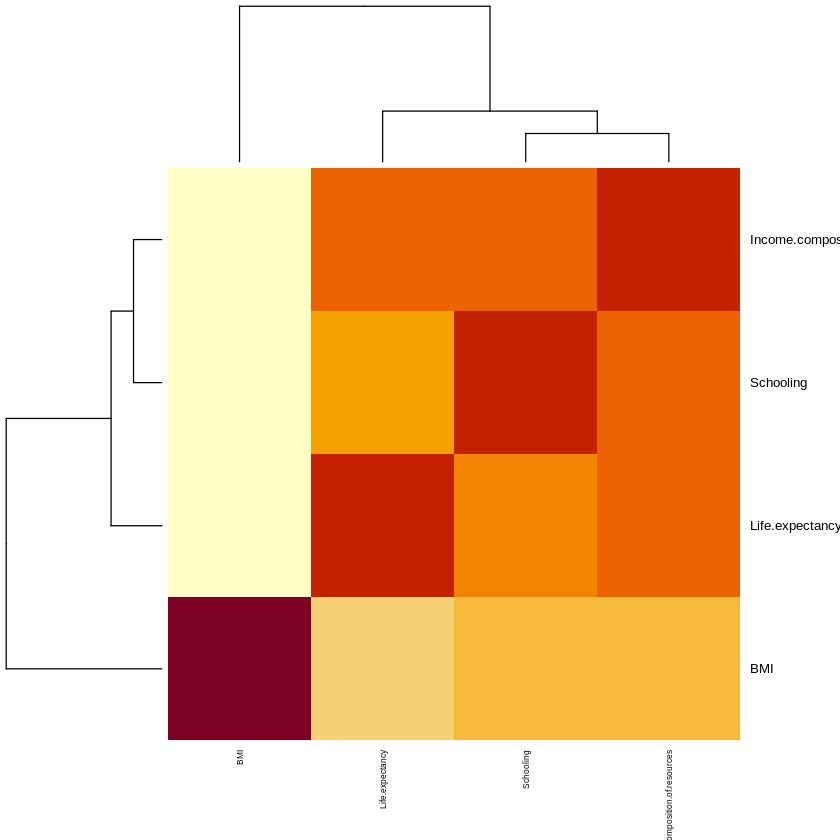

In [ ]:
data = signif(cor(na.omit( df[ ,c('BMI','Life.expectancy','Income.composition.of.resources','Schooling')]) ),2)

heatmap(data, cexRow=0.8, cexCol=0.5)

Agora você já sabe como buscar relações lineares e não lineares em um conjunto de dados!

# Melhores Gráficos

Para os nossos propósitos os gráficos acima serão suficientes. Mas se você se interessa por gráficos com uma apresentação mais profissional pode empregar a biblioteca `ggplot2`.

Ela é uma das bibliotecas mais empregadas para produzir visualizações profissionais dos dados, mas exige um pouco mais de conhecimento para o uso de suas funções e você pode consultar alguma das referências abaixo para empregar o `ggplot`.

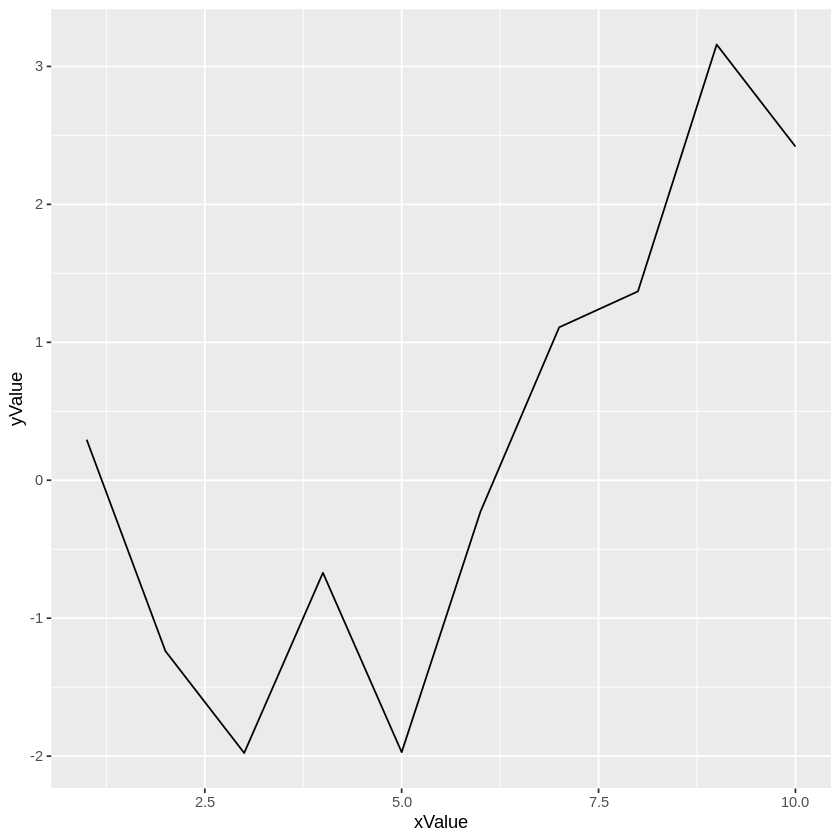

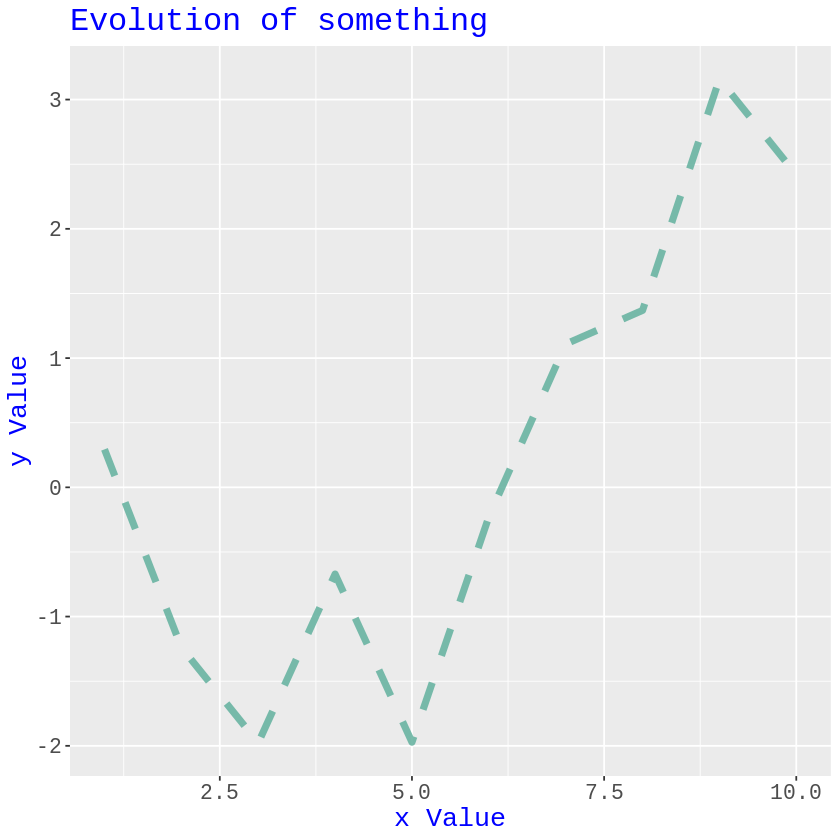

In [ ]:
# Libraries
library(ggplot2)

# create data
xValue <- 1:10
yValue <- cumsum(rnorm(10))
data <- data.frame(xValue,yValue)

# Plot 1
ggplot(data, aes(x=xValue, y=yValue)) +
  geom_line()

# Plot 2
ggplot(data, aes(x=xValue, y=yValue)) +
  geom_line( color="#69b3a2", size=2, alpha=0.9, linetype=2) +
  ggtitle("Evolution of something") +
  xlab("x Value") + ylab("y Value") +
  theme(text=element_text(size=16,  family="Comic Sans MS", color = 'blue'))

Uma das grandes vantagens do `ggplot` é separar a camada de apresentação da camada de dados ao produzir os gráficos (veja a sintaxe acima). Isso fornece uma sintaxe muito mais flexível e que permite trabalhar com gráficos bastante mais sofisticados de modo profissional. 



# Para Saber Mais

1. E se você quer entender um pouco mais sobre visualização de dados em geral, isto é, independente das ferramentas que são empregadas, você pode assistir a

>> **Kieran Healy Principles of Data Visualization** https://youtu.be/wHrzsO564uA.

2. Interessado em Visualizações de Dados com Python? Então acesse *Oliveira, Rogério de*. **Introdução à Visualização de Dados com Python**. Ed. Mackenzie. Coleção Conexão Inicial. *pre-print* (2021) disponível em: https://github.com/Rogerio-mack/Visualizacao-de-Dados-em-Python. Lá você encontrará os mesmos tipos de gráficos que você encontra aqui empregando Python, e poderá também se aprofundar nos aspectos gerais da visualização de dados.

1. **Galeria de Gráficos**. Além dos sites dos pacotes, em que você encontra diversos exemplos de código, diversos sites trazem inúmeros exemplos úteis de gráficos o *Data-to-Viz* é um deles https://www.data-to-viz.com/. Eles traz uma classificação de tipos de gráfico com base no formato de dados de entrada (dados numéricos, categóricos etc.) e apresenta uma árvore de decisão que leva a um conjunto de visualizações potencialmente mais adequadas. Ele apresenta exemplos de código em R, Python e D3.js, e você poderá achar isso bastante útil.

1. Interessou-se pelo `ggplot` e como produzir visualizações avançadas em R? Então, consulte o livro **R Graphics Cookbook** em https://r-graphics.org/index.html ele ensina você a criar vários gráficos com o `ggplot` e ainda faz um paralelo com os gráficos simples de R que empregamos aqui.

# Referências

Oliveira, Rogério de. **Introdução à Visualização de Dados com Python**. Ed. Mackenzie. Coleção Conexão Inicial. *pre-print* (2021). Disponível em: https://github.com/Rogerio-mack/Visualizacao-de-Dados-em-Python. Acesso: 10.09.2021

Navarro, Danielle, **Learning Statistics with R**, disponível em: https://learningstatisticswithr.com/ ( LSR version 0.6 (pdf) ). Acesso: 26/02/2021.
Alternativamente em formato bookdown: https://learningstatisticswithr.com/book/ Acesso: 07/03/2021.

Wickham, H., Grolemund, G. **R for Data Science**. O'Reilly Media, Inc., 2016.

Chang, W. **R Graphics Cookbook**. O'Reilly Media, Inc. 2nd edition, 2021. Alternativamente em formato eletrônico: https://r-graphics.org/index.html. Acesso: 07/03/2021.